<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


## **Advanced Prognosis using Neural Networks in HealthCare**


Estimated time needed: **2** hours


## Abstract


This laboratory is devoted to predicting the COVID-19 spread dynamics in the world using neural networks of different structures. We will learn how to make predictions based on linear regression, back propagation  and long short-term memory neural networks


## Introduction


Today there is a lot of open data about the spread of COVID-19 in the world. However, few tools are presented to predict  these processes.
This laboratory work will show how you can download data from open sources, perform preliminary data analysis, transform and clear data, perform correlation and lag analysis.

3 different mathematical models for the forecast calculation will be considered next.

To do this, the division of the DataSet into training and test sets will be demonstrated. We will learn how to normalize data and make preliminary analysis. 
It will be shown how to build models and DataSets for using 2 different neural networks. The next step is to build a forecast and compare the accuracy and adequacy of the obtained models.


## Materials and methods


In this lab, we will learn the basic methods of time series forecasting. The laboratory consists of three stages:
* Download and preliminary analysis of data
* Linear Regression
* Back Propagation NN
* Long Short-Term Memory - LSTM

The first stage will show you how to download data and pre-prepare it for analysis:
* download data
* change the data types of columns
* rows filtering
* elimination of missing data
* DataSet transformation
* data normalization

During the next steps, we will demonstrate 3 different models for forecasting time series.


The statistical data was obtained from https://ourworldindata.org/coronavirus under the Creative Commons BY license.


## Prerequisites
* [Python](https://www.python.org)
* [Pandas](https://pandas.pydata.org)
* Statistics
* [NumPy](https://numpy.org)
* [Matplotlib](https://matplotlib.org)
* [Keras](https://keras.io)
* [Scikit-Learn](https://scikit-learn.org)


## Objectives


After completing this lab, you will be able to:


* Download a DataSet from *.csv files
* Automatically change data in the DataSet
* Transform the table
* Visualize data with pandas
* Make forecast models based on Neural Networks


## Required libraries installation


We need to install additional libraries and upgrade existing ones in the lab.


In [1]:
!mamba install scikit-learn -y


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.2) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['scikit-learn']

[+] 0.0s
[+] 0.1s
pkgs/main/linux-64 ━━━━━━━━╸━━━━━━━━━━━━━━━━   0.0 B /  ??.?MB @

In [2]:
conda install -c conda-forge keras --yes

done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 23.9.0

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.9.0



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - keras


The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    pkgs/main::ca-certificates-2023.08.22~ --> conda-forge::ca-certificates-2023.7.22-hbcca054_0 
  openssl              pkgs/main::openssl-1.1.1w-h7f8727e_0 --> conda-forge::openssl-1.1.1w-hd590300_0 




Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


In [3]:
conda install -c conda-forge tensorflow --yes

done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 23.9.0

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.9.0



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [4]:
conda install -c scikit-learn tensorflow --yes

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - tensorflow


The following packages will be UPDATED:

  ca-certificates    conda-forge::ca-certificates-2023.7.2~ --> pkgs/main::ca-certificates-2023.08.22-h06a4308_0 

The following packages will be SUPERSEDED by a higher-priority channel:

  openssl            conda-forge::openssl-1.1.1w-hd590300_0 --> pkgs/main::openssl-1.1.1w-h7f8727e_0 




Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


## Download and preliminary analysis of data


### Download data


Some libraries should be imported before you can begin.


In [5]:
import pandas as pd
import numpy as np


We will use the same DataSet as in the previous lab. Therefore, we have to repeat the preliminary transformation first, like we did before.
The next step is to download the data file from the [open repository produced by Our World in Data under the Creative Commons BY license](https://ourworldindata.org/coronavirus) by the **[read_csv()](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)**.


In [6]:
covid_word = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/data-science-in-health-care-advanced-prognostication-using-by-neural-networks/owid-covid-data.csv')
covid_word

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86197,ZWE,Africa,Zimbabwe,2021-05-01,38260.0,3.0,28.000,1568.0,1.0,1.714,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
86198,ZWE,Africa,Zimbabwe,2021-05-02,38281.0,21.0,27.857,1570.0,2.0,1.857,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
86199,ZWE,Africa,Zimbabwe,2021-05-03,38293.0,12.0,27.286,1573.0,3.0,1.857,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
86200,ZWE,Africa,Zimbabwe,2021-05-04,38327.0,34.0,23.286,1574.0,1.0,1.286,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


Let's study our DataSet. As you can see, it consist of 86202 rows × 59 columns. The first 3 columns contain Geo information. Column 4 - date of measurement. Another 55 - COVID-19 data. Also some missing data are observed in the DataSet. We should be sure that Python recognized types of data correctly. To do this, we should use **[pandas.info()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html?highlight=info#pandas.DataFrame.info)**.


In [7]:
covid_word.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86202 entries, 0 to 86201
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               86202 non-null  object 
 1   continent                              82046 non-null  object 
 2   location                               86202 non-null  object 
 3   date                                   86202 non-null  object 
 4   total_cases                            84067 non-null  float64
 5   new_cases                              84065 non-null  float64
 6   new_cases_smoothed                     83064 non-null  float64
 7   total_deaths                           74363 non-null  float64
 8   new_deaths                             74521 non-null  float64
 9   new_deaths_smoothed                    83064 non-null  float64
 10  total_cases_per_million                83613 non-null  float64
 11  ne

As you can see, 54 columns of COVID-19 data were recognized correctly (float64). First 4 columns and tests_units were recognized as objects. Let's investigate them:


In [8]:
fields = ['iso_code', 'continent', 'location', 'tests_units']
covid_word[fields]

,iso_code,continent,location,tests_units
0,AFG,Asia,Afghanistan,NaN
1,AFG,Asia,Afghanistan,NaN
2,AFG,Asia,Afghanistan,NaN
3,AFG,Asia,Afghanistan,NaN
4,AFG,Asia,Afghanistan,NaN
...,...,...,...,...
86197,ZWE,Africa,Zimbabwe,tests performed
86198,ZWE,Africa,Zimbabwe,tests performed
86199,ZWE,Africa,Zimbabwe,NaN
86200,ZWE,Africa,Zimbabwe,NaN


Let's show information about the field date.


In [9]:
covid_word['date'] ##YOUR CODE GOES HERE## 

0        2020-02-24
1        2020-02-25
2        2020-02-26
3        2020-02-27
4        2020-02-28
            ...    
86197    2021-05-01
86198    2021-05-02
86199    2021-05-03
86200    2021-05-04
86201    2021-05-05
Name: date, Length: 86202, dtype: object

<details><summary>Click <b>here</b> for the solution</summary> <code>
covid_word['date']
</code></details>


### Сhange the data types of columns


As you can see, the columns: 'iso_code', 'continent', 'location', 'tests_units' have many repetitions and should be assigned to categorical fields **([pandas.astype()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html?highlight=astype#pandas.DataFrame.astype))**.
The field 'data' should be converted into DataTime type **([pandas.to_datetime()](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html))**. To see the results we can use **[pandas.describe()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html?highlight=describe#pandas.DataFrame.describe)**.


In [10]:
fields = ['iso_code', 'continent', 'location', 'tests_units']
covid_word[fields] = covid_word[fields].astype('category') ##YOUR CODE GOES HERE##
covid_word.loc[:, 'date'] = pd.to_datetime(covid_word['date'])
covid_word[fields].describe()

,iso_code,continent,location,tests_units
count,86202,82046,86202,46453
unique,219,6,219,4
top,ARG,Africa,Argentina,tests performed
freq,491,22525,491,28782


<details><summary>Click <b>here</b> for the solution</summary> <code>
covid_word[fields].astype('category')
</code></details>


### Rows filtering


As we can see, the DataSet contains information about 6 continents and 219 countries. 
The field 'tests_units' consist of 4 categories. To show a list of countries, we can use **[pandas.Series.cat.categories](https://pandas.pydata.org/docs/reference/api/pandas.Series.cat.categories.html)**.


In [11]:
covid_word['location'].cat.categories

Index(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       ...
       'Uruguay', 'Uzbekistan', 'Vanuatu', 'Vatican', 'Venezuela', 'Vietnam',
       'World', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', length=219)

Let's investigate the dynamics of new cases of COVID-19 for a separate country. We will use Ukraine for saving models and further forecast. You can use your country. Let's use a pandas filter to do this.


In [12]:
covid_word.index = covid_word['date']
c_covid = covid_word[covid_word['location'] == "Ukraine"] ##YOUR CODE GOES HERE##
c_covid

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
date,,,,,,,,,,,,,,,,,,,,,
2020-03-03,UKR,Europe,Ukraine,2020-03-03,1.0,1.0,NaN,NaN,NaN,NaN,...,7894.393,0.1,539.849,7.11,13.5,47.4,NaN,8.8,72.06,0.779
2020-03-04,UKR,Europe,Ukraine,2020-03-04,1.0,0.0,NaN,NaN,NaN,NaN,...,7894.393,0.1,539.849,7.11,13.5,47.4,NaN,8.8,72.06,0.779
2020-03-05,UKR,Europe,Ukraine,2020-03-05,1.0,0.0,NaN,NaN,NaN,NaN,...,7894.393,0.1,539.849,7.11,13.5,47.4,NaN,8.8,72.06,0.779
2020-03-06,UKR,Europe,Ukraine,2020-03-06,1.0,0.0,NaN,NaN,NaN,NaN,...,7894.393,0.1,539.849,7.11,13.5,47.4,NaN,8.8,72.06,0.779
2020-03-07,UKR,Europe,Ukraine,2020-03-07,1.0,0.0,NaN,NaN,NaN,NaN,...,7894.393,0.1,539.849,7.11,13.5,47.4,NaN,8.8,72.06,0.779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-01,UKR,Europe,Ukraine,2021-05-01,2132742.0,8672.0,8800.000,46281.0,358.0,342.429,...,7894.393,0.1,539.849,7.11,13.5,47.4,NaN,8.8,72.06,0.779
2021-05-02,UKR,Europe,Ukraine,2021-05-02,2137959.0,5217.0,8394.143,46447.0,166.0,332.286,...,7894.393,0.1,539.849,7.11,13.5,47.4,NaN,8.8,72.06,0.779
2021-05-03,UKR,Europe,Ukraine,2021-05-03,2140838.0,2879.0,8064.857,46607.0,160.0,326.286,...,7894.393,0.1,539.849,7.11,13.5,47.4,NaN,8.8,72.06,0.779


<details><summary>Click <b>here</b> for the solution</summary> <code>
c_covid = covid_word[covid_word['location'] == "Ukraine"]
</code></details>


Let's choose the fields 'new_cases', 'new_cases_smoothed' for forecasting. First of all, we should visualize this data.


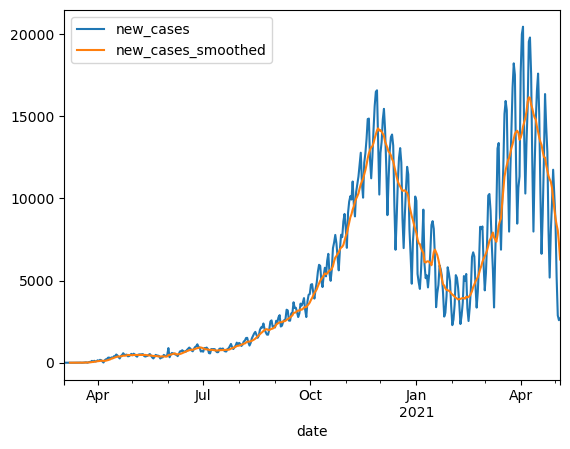

In [13]:
import matplotlib.pyplot as plt
fields = ['new_cases', 'new_cases_smoothed']
c_covid[fields].plot()
plt.show() ##YOUR CODE GOES HERE##

<details><summary>Click <b>here</b> for the solution</summary> 
<code>
import matplotlib.pyplot as plt
fields = ['new_cases', 'new_cases_smoothed']
c_covid[fields].plot()
plt.show()
</code>
</details>


### Elimination of missing data


As you can see, there are large fluctuations in the new cases plot. Let's try to make a forecast for these waves.
First of all, we should delete missing data using [*pandas.DataFrame.dropna()*](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html).


In [14]:
c_covid = c_covid[fields].dropna()
c_covid

,new_cases,new_cases_smoothed
date,,
2020-03-08,0.0,0.143
2020-03-09,0.0,0.143
2020-03-10,0.0,0.000
2020-03-11,0.0,0.000
2020-03-12,0.0,0.000
...,...,...
2021-05-01,8672.0,8800.000
2021-05-02,5217.0,8394.143
2021-05-03,2879.0,8064.857


### Data transformation


If we want to make a forecast of time series, the only assumption that can be made - the data for today depends on the previous days values. To check for dependencies, it is necessary to perform a correlation analysis between them. This requires:
1. duplicating the time series of data and moving it vertically down for a certain number of days (lag)
2. deleting the missing data at the beginning and end (they are formed by vertical shift (**[pandas.DataFrame.shift()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html)**)
3. calculating the correlation coefficient between the obtained series.

Since this operation should be performed for different values of the lag, it is convenient to create a separate function:


In [15]:
def lag_correlation_ts(y, x, lag):
    """
    Lag correlation for 2 DateSeries
    :param y: fixed
    :param x: shifted
    :param lag: lag for shifting
    :return: DataFrame of lags correlation coefficients
    """
    r = [0] * (lag + 1)
    y = y.copy()
    x = x.copy()
    y.name = "y"
    x.name = "x"

    for i in range(0, lag + 1):
        ds = y.copy().to_frame()
        ds = ds.join(x.shift(i), how='outer')
        r[i] = ds.corr().values[0][1]
    r = pd.DataFrame(r)
    r.index.names = ['Lag']
    r.columns = ['Correlation']
    return r

Let's create a target DataSet.


In [16]:
y_dataset = c_covid['new_cases']
y_dataset

date
2020-03-08       0.0
2020-03-09       0.0
2020-03-10       0.0
2020-03-11       0.0
2020-03-12       0.0
               ...  
2021-05-01    8672.0
2021-05-02    5217.0
2021-05-03    2879.0
2021-05-04    2589.0
2021-05-05    2694.0
Name: new_cases, Length: 424, dtype: float64

Let's test a 30-day lag.


     Correlation
Lag             
0         1.0000
1         0.9581
2         0.8851
3         0.8296
4         0.8252
5         0.8719
6         0.9334
7         0.9612
8         0.9176
9         0.8434
10        0.7871
11        0.7816
12        0.8237
13        0.8792
14        0.9019
15        0.8555
16        0.7801
17        0.7225
18        0.7155
19        0.7553
20        0.8056
21        0.8217
22        0.7740
23        0.6986
24        0.6408
25        0.6320
26        0.6682
27        0.7129
28        0.7280
29        0.6819
30        0.6101


<AxesSubplot:xlabel='Lag'>

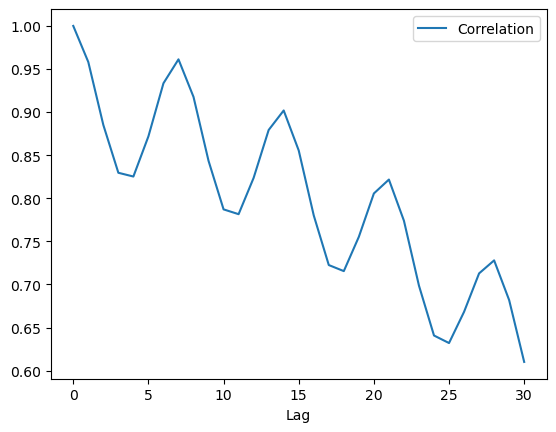

In [17]:
pd.options.display.float_format = '{:,.4f}'.format
l = pd.DataFrame(lag_correlation_ts(y_dataset, y_dataset, 30)) #For time series we should use y_Dataset like input and output
print(l)
l.plot()

As you can see, there are some waves observed in the lag plot. You can see from the table that there is a peak for every seventh day. (Maximum lags are: 7, 14, 21, etc. days). This is due to the weekly cycle.

Any forecast model can be shown as a black box of input-target type. The target should be the data of the original time series, and the input should be the values for the previous days.


<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/data-science-in-health-care-advanced-prognostication-using-by-neural-networks/FM.png" width="1000" alt="cognitiveclass.ai logo">
</center>



To automate this process, let's make a universal function for time series transformation to create this DataSet.


In [18]:
def series_to_supervised(in_data, tar_data, n_in=1, dropnan=True, target_dep=False):
    """
    Transformation into a training sample taking into account the lag
     : param in_data: Input fields
     : param tar_data: Output field (single)
     : param n_in: Lag shift
     : param dropnan: Do destroy empty lines
     : param target_dep: Whether to take into account the lag of the input field. If taken into account, the input will start with a lag 1
     : return: Training sample. The last field is the source
    """

    n_vars = in_data.shape[1]
    cols, names = list(), list()

    if target_dep:
        i_start = 1
    else:
        i_start = 0
    for i in range(i_start, n_in + 1):
        cols.append(in_data.shift(i))
        names += [('%s(t-%d)' % (in_data.columns[j], i)) for j in range(n_vars)]

    if target_dep:
        for i in range(n_in, -1, -1):
            cols.append(tar_data.shift(i))
            names += [('%s(t-%d)' % (tar_data.name, i))]
    else:
        # put it all together
        cols.append(tar_data)
        names.append(tar_data.name)
    agg = pd.concat(cols, axis=1)
    agg.columns = names

    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)

    return agg

As mentioned above, when forecasting time series, the input and output fields are the same, only shifted by the lag.


In [19]:
dataset = series_to_supervised(pd.DataFrame(y_dataset), y_dataset, 14)
dataset

,new_cases(t-0),new_cases(t-1),new_cases(t-2),new_cases(t-3),new_cases(t-4),new_cases(t-5),new_cases(t-6),new_cases(t-7),new_cases(t-8),new_cases(t-9),new_cases(t-10),new_cases(t-11),new_cases(t-12),new_cases(t-13),new_cases(t-14),new_cases
date,,,,,,,,,,,,,,,,
2020-03-22,26.0000,18.0000,13.0000,2.0000,0.0000,7.0000,4.0000,0.0000,0.0000,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,26.0000
2020-03-23,0.0000,26.0000,18.0000,13.0000,2.0000,0.0000,7.0000,4.0000,0.0000,0.0000,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2020-03-24,24.0000,0.0000,26.0000,18.0000,13.0000,2.0000,0.0000,7.0000,4.0000,0.0000,0.0000,2.0000,0.0000,0.0000,0.0000,24.0000
2020-03-25,48.0000,24.0000,0.0000,26.0000,18.0000,13.0000,2.0000,0.0000,7.0000,4.0000,0.0000,0.0000,2.0000,0.0000,0.0000,48.0000
2020-03-26,51.0000,48.0000,24.0000,0.0000,26.0000,18.0000,13.0000,2.0000,0.0000,7.0000,4.0000,0.0000,0.0000,2.0000,0.0000,51.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-01,"8,672.0000","10,190.0000","11,750.0000","9,709.0000","8,037.0000","5,184.0000","8,058.0000","12,841.0000","14,400.0000","16,357.0000","12,287.0000","9,060.0000","6,630.0000","10,407.0000","15,104.0000","8,672.0000"
2021-05-02,"5,217.0000","8,672.0000","10,190.0000","11,750.0000","9,709.0000","8,037.0000","5,184.0000","8,058.0000","12,841.0000","14,400.0000","16,357.0000","12,287.0000","9,060.0000","6,630.0000","10,407.0000","5,217.0000"
2021-05-03,"2,879.0000","5,217.0000","8,672.0000","10,190.0000","11,750.0000","9,709.0000","8,037.0000","5,184.0000","8,058.0000","12,841.0000","14,400.0000","16,357.0000","12,287.0000","9,060.0000","6,630.0000","2,879.0000"


As you can see, the first and last columns contain the same target data. 
Now we should create input (**X**) and output (**Y**) DataSets for forecasting models.


In [20]:
col = dataset.columns
X, Y = dataset[col[1:-1]], dataset[col[-1]]

print("Input columns: ", X.columns)
print("Target column: ", Y.name) 


Input columns:  Index(['new_cases(t-1)', 'new_cases(t-2)', 'new_cases(t-3)', 'new_cases(t-4)',
       'new_cases(t-5)', 'new_cases(t-6)', 'new_cases(t-7)', 'new_cases(t-8)',
       'new_cases(t-9)', 'new_cases(t-10)', 'new_cases(t-11)',
       'new_cases(t-12)', 'new_cases(t-13)', 'new_cases(t-14)'],
      dtype='object')
Target column:  new_cases


<details><summary>Click <b>here</b> for the solution</summary> 
<code>
Y.name
</code>
</details>


### Data normalization


After that, we should normalize all the data. To do this, the [**sklearn.preprocessing.MinMaxScaler**](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) module should be used. 
It allows us to normalize [**fit_transform()**](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler.fit_transform) and convert back all the data easily: [**inverse_transform()**](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler.inverse_transform).


In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

scaled_x = scaler_x.fit_transform(X)
scaled_y = scaler_y.fit_transform(Y.values.reshape(-1, 1))

After that, we are going to form training and test DataSets using [**sklearn.model_selection.train_test_split()**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). We will make them at the ratio of 70/30. Without shuffling. It means, that test samples are located in the end of **X** and **Y** DataSets.

Input normalized DataSets: **X_train, X_test**

Target normalized DataSets: **y_train, y_test**


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_x, scaled_y, test_size=0.3, shuffle=False)

All the data is normalized now. However, in order to compare to results, we need real scale data of the training and test DataSet:


In [23]:
res_train = scaler_y.inverse_transform(y_train).flatten()
res_test = scaler_y.inverse_transform(y_test).flatten()

Target real scale DataSets: **res_train, res_test**.


# Linear Regression


First of all, we should create a model. We will test three type of models. A Linear regression, a Multilayer Neural Network with Backpropagation and a Long Short-Term Memory Neural Network.
Let's create a [**LinearRegression()**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html): 


In [24]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

After that, our model should be fitted on the training DataSet. Regardless of the model type, the function fit() is used to do this.


In [25]:
regressor.fit(X_train, y_train)

LinearRegression()

Then we can test it on the test DataSet and use it for prognostication. 


In [26]:
y_pred_test_ln = regressor.predict(X_test)
y_pred_test_ln = scaler_y.inverse_transform(y_pred_test_ln).flatten()

Let's analyze the results accuracy using **[sklearn.metrics](https://scikit-learn.org/stable/modules/model_evaluation.html)**.


In [27]:
from sklearn import metrics
print("Correlation train", regressor.score(X_train, y_train))
print("Correlation test", regressor.score(X_test, y_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_test_ln))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_test_ln))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_ln)))

Correlation train 0.9926249155830551
Correlation test 0.9234175543987099
Mean Absolute Error: 8480.337054107707
Mean Squared Error: 94552666.37236445
Root Mean Squared Error: 9723.81953618867


# Back Propagation NN


The modern approach to the establishment of complex functional dependencies is the use of neural networks. A classical neural network is a [**multilayer neural network with back propagation**](https://en.wikipedia.org/wiki/Backpropagation).

To do this, we will use the [**keras**](https://keras.io) framework.
First of all, we should create a Neural Network model as a separate function.

A neural network is a sequence of layers. The function [**Sequential()**](https://keras.io/guides/sequential_model/) is used to create a network.

Let's create a network that consists of 2 hidden layers. Each of which consists of 100 neurons. [**keras.layers.Dense()**](https://keras.io/api/layers/core_layers/dense/).

To avoid retraining problems, we will use additional layers [**keras.layers.Dropout()**](https://keras.io/api/layers/regularization_layers/dropout/).

The output layer will consist of one neuron, since we have only one value at the output.

The model should be compiled for fitting and predicting: [**keras.Model.compile()**](https://keras.io/api/models/model_training_apis/).


In [28]:
def BP_model(X):
    """
    Multilayer neural network with back propagation.
    :param X: Input DataSet
    :return: keras NN model
    """
    # create model
    model = Sequential() 
    model.add(Dense(100, input_dim=X.shape[1], kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(100, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

Once the model function is built, it is necessary to create a neural network directly and specify the learning parameters: [**keras.wrappers.scikit_learn.KerasRegressor()**](https://keras.io/zh/scikit-learn-api/). Also we should define the number of fitting [**epoch and batch size**](https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/).


In [29]:
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
epochs = 1000

batch_size=int(y_train.shape[0]*.1)

estimator = KerasRegressor(build_fn=BP_model, X=X_train, epochs=epochs, batch_size=batch_size, verbose=1)

Using TensorFlow backend.
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jupyterlab/con

Now, let’s train our model for **1000** epochs.
It should be noted that the fitting process is very slow. Therefore, we saved our fitted model to a file.
To save time, we will upload the fitted model.
If you like, you can leave the parameter **fitting on True** to refit the model.
If you like, you can leave the parameter **fitting_save on True** to resave the model.


In [30]:
fitting = True
fitting_save = True

import pickle

if fitting:
    history=estimator.fit(X_train,y_train, validation_data=(X_test,y_test)) # Fitting model
    if fitting_save:
        # Save model
        estimator.model.save('BP_saved_model.h5')
        print("Saved model to disk")
        with open('history.pickle', 'wb') as f:
            pickle.dump(history.history, f)
# load model 
from keras.models import load_model

# Instantiate the model as you please (we are not going to use this)
estimator = KerasRegressor(build_fn=BP_model, X=X_train, epochs=epochs, batch_size=batch_size, verbose=1)
# This is where you load the actual saved model into a new variable.
estimator.model = load_model('BP_saved_model.h5')    
with open('history.pickle', 'rb') as f:
    history = pickle.load(f)
print("Loaded model from disk")

2023-11-02 16:50:59.571019: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
2023-11-02 16:50:59.576566: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2394310000 Hz
2023-11-02 16:50:59.577332: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55acfb2ce660 executing computations on platform Host. Devices:
2023-11-02 16:50:59.577393: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): <undefined>, <undefined>
2023-11-02 16:50:59.618386: W tensorflow/compiler/jit/mark_for_compilation_pass.cc:1412] (One-time warning): Not using XLA:CPU for cluster because envvar TF_XLA_FLAGS=--tf_xla_cpu_global_jit was not set.  If you want XLA:CPU, either set that envvar, or use experimental_jit_scope to enable XLA:CPU.  To confirm that XLA is active, pass --vmodule=xla_compilation_cache=1 (as a proper command-line fl

Train on 287 samples, validate on 123 samples
Epoch 1/1000
287/287 [==============================] - 0s 890us/step - loss: 0.0529 - val_loss: 0.0593
Epoch 2/1000
287/287 [==============================] - 0s 226us/step - loss: 0.0117 - val_loss: 0.0345
Epoch 3/1000
287/287 [==============================] - 0s 259us/step - loss: 0.0073 - val_loss: 0.0243
Epoch 4/1000
287/287 [==============================] - 0s 211us/step - loss: 0.0047 - val_loss: 0.0212
Epoch 5/1000
287/287 [==============================] - 0s 215us/step - loss: 0.0053 - val_loss: 0.0210
Epoch 6/1000
287/287 [==============================] - 0s 218us/step - loss: 0.0047 - val_loss: 0.0196
Epoch 7/1000
287/287 [==============================] - 0s 225us/step - loss: 0.0037 - val_loss: 0.0188
Epoch 8/1000
287/287 [==============================] - 0s 213us/step - loss: 0.0046 - val_loss: 0.0179
Epoch 9/1000
287/287 [==============================] - 0s 261us/step - loss: 0.0029 - val_loss: 0.0173
Epoch 10/1000
287/

Let's show the [**loss and validation loss dynamics**](https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/).


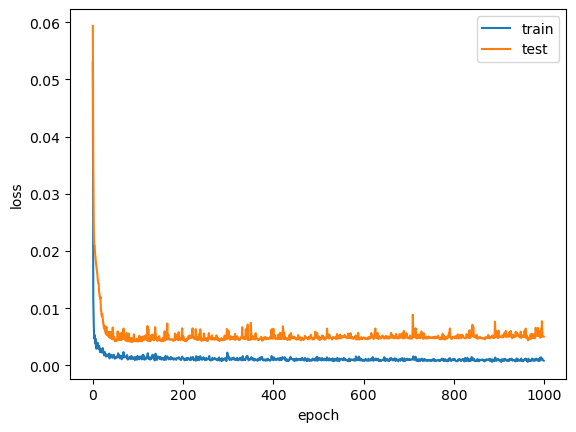

In [31]:
plt.figure()
plt.plot(history['loss'], label='train')
plt.plot(history['val_loss'], label='test')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.plot(history.history['acc'], label='acc')
#plt.plot(history.history['val_acc'], label='acc test')
plt.legend()
plt.show()

As you can see, a Neural Network is well-fitted and no overfitting is observed.
Let's calculate a prediction of the training (**res_train_ANN**) an test (**res_test_ANN**) sets.


Let's calculate a forecast and make an inverse normalization to real scale.


In [32]:
res_tr=estimator.predict(X_train)
res_ts=estimator.predict(X_test)
res_train_ANN=scaler_y.inverse_transform(res_tr.reshape(-1, 1)).flatten()
res_test_ANN=scaler_y.inverse_transform(res_ts.reshape(-1, 1)).flatten()

123/123 [==============================] - 0s 122us/step


Let's compare the accuracy of a Linear Regression and a Neural Network.


In [33]:
print("Correlation train", np.corrcoef(res_train, res_train_ANN)[0,1])
print("Correlation train", np.corrcoef(res_test, res_test_ANN)[0,1])
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, res_test_ANN))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, res_test_ANN))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, res_test_ANN))) ##YOUR CODE GOES HERE## 

Correlation train 0.9971319938280792
Correlation train 0.9517006907632836
Mean Absolute Error: 8476.500448696921
Mean Squared Error: 92563483.34560792
Root Mean Squared Error: 9620.991806752978


<details><summary>Click <b>here</b> for the solution</summary> 
<code>
print("Correlation train", np.corrcoef(res_train, res_train_ANN)[0,1])
print("Correlation train", np.corrcoef(res_test, res_test_ANN)[0,1])
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, res_test_ANN))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, res_test_ANN))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, res_test_ANN)))
</code>
</details>


You can see that we got slightly better results for a Neural Network than for a Linear Regression.


# Long Short-Term Memory - LSTM


Unlike standard feedforward neural networks, [**LSTM**](https://en.wikipedia.org/wiki/Long_short-term_memory) has feedback connections. It can process not only single data points, but also entire sequences of data (such as speech, video or time series). 

In case of time series, the neural network has one input and one output. However, there should be a vector of time series values for the previous time period on the input.


<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/data-science-in-health-care-advanced-prognostication-using-by-neural-networks/LSTM.png" width="1000" alt="cognitiveclass.ai logo">
</center>


To do this, we should transform input DataSets into 3D shape.


In [34]:
train_x_LSTM = X_train.reshape((X_train.shape[0], 1, 14))
test_x_LSTM = X_test.reshape((X_test.shape[0], 1, 14))

Let's create an LSTM Neural Network consisting of one [**LSTM**](https://keras.io/api/layers/recurrent_layers/lstm/) layer and one BP layer like in the previous case.
As you can see, in this case our NN will consist of 7 LSTM and 7 BP neurons only.


In [35]:
from keras.layers import LSTM

batch_size=int(y_train.shape[0]*.1)
model = Sequential()
model.add(LSTM(7, input_shape=(train_x_LSTM.shape[1], train_x_LSTM.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(7, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(y_train.shape[1])) #activation='sigmoid'
model.compile(loss='mean_squared_error', optimizer='adam')
#model.compile(loss='mae', optimizer='adam')


All subsequent steps of learning, storing, reading and predicting are similar to the ones we used with the previous neural network. You can see that only 400 epochs are enough for an LSTM.


In [36]:
fitting = True
fitting_save = True
epochs = 400

if fitting:
    history = model.fit(train_x_LSTM, y_train, epochs=epochs, batch_size=batch_size, validation_data=(test_x_LSTM, y_test), verbose=1, shuffle=False)    
    if fitting_save:
    # serialize model to JSON
        model_json = model.to_json()
        with open("LSTM_model.json", "w") as json_file:
            json_file.write(model_json)
        # serialize weights to HDF5
        model.save_weights("LSTM_model.h5")
        print("Saved model to disk")
        with open('history_LSTM.pickle', 'wb') as f:
            pickle.dump(history.history, f)
# load model  
from keras.models import model_from_json
json_file = open('LSTM_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into new model
model.load_weights("LSTM_model.h5")        
with open('history_LSTM.pickle', 'rb') as f:
    history = pickle.load(f)
print("Loaded model from disk")

Train on 287 samples, validate on 123 samples
Epoch 1/400
287/287 [==============================] - 1s 2ms/step - loss: 0.0690 - val_loss: 0.1836
Epoch 2/400
287/287 [==============================] - 0s 421us/step - loss: 0.0561 - val_loss: 0.1578
Epoch 3/400
287/287 [==============================] - 0s 464us/step - loss: 0.0482 - val_loss: 0.1335
Epoch 4/400
287/287 [==============================] - 0s 430us/step - loss: 0.0404 - val_loss: 0.1112
Epoch 5/400
287/287 [==============================] - 0s 408us/step - loss: 0.0357 - val_loss: 0.0920
Epoch 6/400
287/287 [==============================] - 0s 421us/step - loss: 0.0325 - val_loss: 0.0755
Epoch 7/400
287/287 [==============================] - 0s 413us/step - loss: 0.0264 - val_loss: 0.0619
Epoch 8/400
287/287 [==============================] - 0s 544us/step - loss: 0.0243 - val_loss: 0.0512
Epoch 9/400
287/287 [==============================] - 0s 700us/step - loss: 0.0258 - val_loss: 0.0436
Epoch 10/400
287/287 [=======

Let's plot the dynamic of loss and val loss like in the previous case.


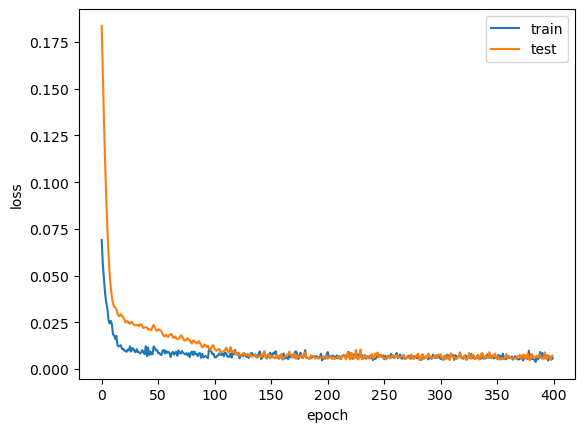

In [37]:
plt.figure()
plt.plot(history['loss'], label='train')
plt.plot(history['val_loss'], label='test')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend()
plt.show() ##YOUR CODE GOES HERE## 
# plot history

<details><summary>Click <b>here</b> for the solution</summary> 
<code>
plt.figure()
plt.plot(history['loss'], label='train')
plt.plot(history['val_loss'], label='test')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend()
plt.show()
</code>
</details>


Let's calculate our forecast.


In [38]:
res_tr_LSTM = model.predict(train_x_LSTM)
res_ts_LSTM = model.predict(test_x_LSTM)
res_train_LSTM=scaler_y.inverse_transform(res_tr_LSTM).flatten()
res_test_LSTM=scaler_y.inverse_transform(res_ts_LSTM).flatten() ##YOUR CODE GOES HERE## 

<details><summary>Click <b>here</b> for the solution</summary> 
<code>
res_tr_LSTM = model.predict(train_x_LSTM)
res_ts_LSTM = model.predict(test_x_LSTM)
res_train_LSTM=scaler_y.inverse_transform(res_tr_LSTM).flatten()
res_test_LSTM=scaler_y.inverse_transform(res_ts_LSTM).flatten()
</code>
</details>


And accuracy:


In [39]:
print("Correlation train", np.corrcoef(res_train, res_train_LSTM)[0,1])
print("Correlation train", np.corrcoef(res_test, res_test_LSTM)[0,1])
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, res_test_LSTM))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, res_test_LSTM))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, res_test_LSTM))) ##YOUR CODE GOES HERE## 

Correlation train 0.9908015592385236
Correlation train 0.9569848772131682
Mean Absolute Error: 7588.70563996026
Mean Squared Error: 73363916.2419032
Root Mean Squared Error: 8565.273856795426


<details><summary>Click <b>here</b> for the solution</summary> 
<code>
print("Correlation train", np.corrcoef(res_train, res_train_LSTM)[0,1])
print("Correlation train", np.corrcoef(res_test, res_test_LSTM)[0,1])
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, res_test_LSTM))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, res_test_LSTM))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, res_test_LSTM)))
</code>
</details>


As you can see, the forecast results of the test data set are much better than ones of the previous models. Let's visualize these 3 results:


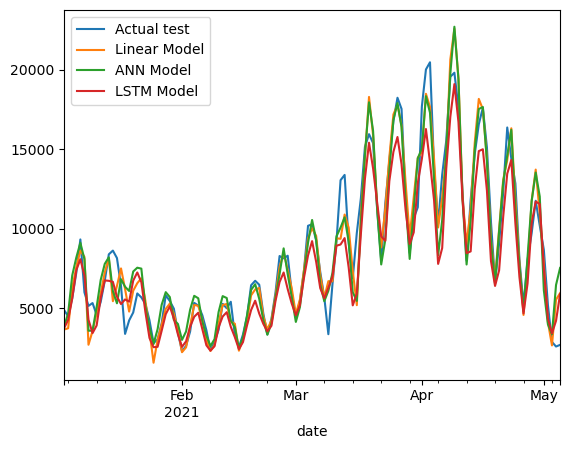

In [40]:
res_pred_test_ln = pd.Series(y_pred_test_ln, name = 'Predicted test Linear Model')
res_pred_test_ANN = pd.Series(res_test_ANN, name = 'Predicted test ANN')
res_pred_test_LSTM = pd.Series(res_test_LSTM, name = 'Predicted test LSTM')

df_2 = pd.DataFrame({'Actual test': res_test, 'Linear Model': res_pred_test_ln, 'ANN Model': res_pred_test_ANN,  'LSTM Model': res_pred_test_LSTM,})
df_2.index = dataset.index[len(dataset)-len(res_test):]
df_2.plot()
plt.show()

As you can see, an LSTM model makes a perfect forecast. A Linear Regression is the fastest forecasting model.


## Conclusions


In this laboratory work, we learned how to build 3 types of forecasting models. We transformed datasets for input-output models. We learned how to normalize and inverse normalize to real scale data. Besides, it was demonstrated how to divide data sets into training and test sets. It was also shown how to predict time series models using lag transformations. We learned how to fit, save, and load different types of neural networks.


## Authors


[Yaroslav Vyklyuk, prof., PhD., DrSc](https://author.skills.network/instructors/yaroslav_vyklyuk_2)


 Copyright &copy; 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/).
